In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc



In [9]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df = df[['v1','v2']]
df.columns = ['label','text']
df['label_num'] = df['label'].map({'ham':0, 'spam':1})


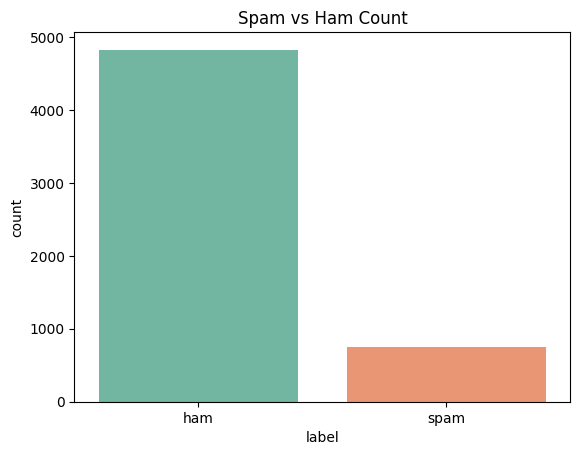

In [11]:

sns.countplot(x='label', data=df, hue='label', palette="Set2", legend=False)
plt.title("Spam vs Ham Count")
plt.show()


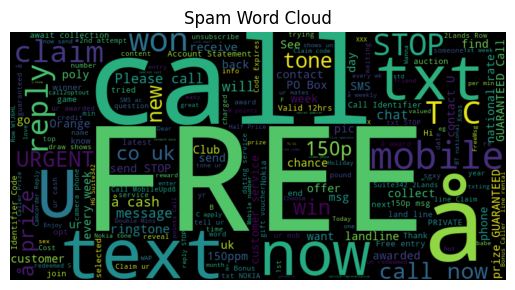

In [12]:
spam_words = " ".join(df[df['label']=='spam']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Spam Word Cloud")
plt.show()


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label_num'], test_size=0.3, random_state=42, stratify=df['label_num']
)



In [15]:
vectorizer = TfidfVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [16]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_preds = nb_model.predict(X_test_vec)



In [17]:
svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)
svm_preds = svm_model.predict(X_test_vec)


In [18]:
print("Naive Bayes Results:")
print(classification_report(y_test, nb_preds, zero_division=0))

print("SVM Results:")
print(classification_report(y_test, svm_preds, zero_division=0))


Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1448
           1       1.00      0.76      0.87       224

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672

SVM Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.99      0.90      0.94       224

    accuracy                           0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.98      1672



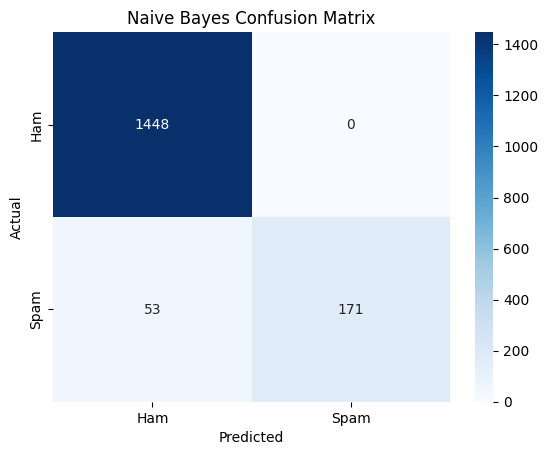

In [19]:
cm = confusion_matrix(y_test, nb_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



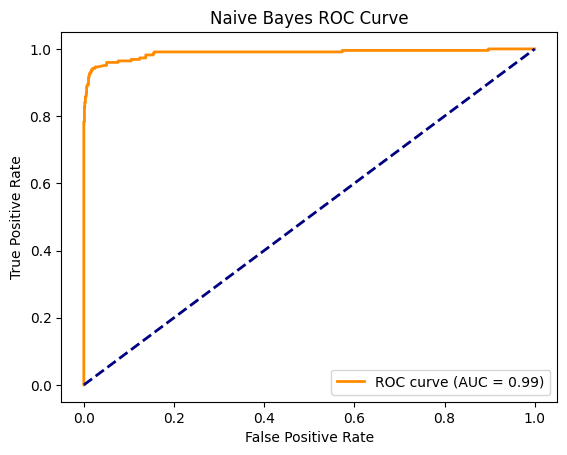

In [20]:
y_score = nb_model.predict_proba(X_test_vec)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [21]:
new_email = ["Congratulations! You won a free iPhone"]
new_email_vec = vectorizer.transform(new_email)
print("Naive Bayes Prediction:", nb_model.predict(new_email_vec)[0])
print("SVM Prediction:", svm_model.predict(new_email_vec)[0])


Naive Bayes Prediction: 0
SVM Prediction: 0
